In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *

In [2]:
# the original dataset is from kaggle: https://www.kaggle.com/datasets/andrewmvd/spotify-playlists
df = pd.read_csv('spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False)

/var/folders/20/60w7k2bn3d9fs3nwbfxtk6p40000gn/T/ipykernel_42527/2529213273.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False)
/var/folders/20/60w7k2bn3d9fs3nwbfxtk6p40000gn/T/ipykernel_42527/2529213273.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False)


In [3]:
df.isnull().sum()

user_id                0
 "artistname"      33568
 "trackname"          85
 "playlistname"     1246
dtype: int64

In [4]:
# Undersampling
df_notnull = df.dropna()

In [5]:
# Change column name for convience
df_notnull.columns = df_notnull.columns.str.replace('"', '')
df_notnull.columns = df_notnull.columns.str.replace('name', '')
df_notnull.columns = df_notnull.columns.str.replace(' ', '')
df_notnull.columns

Index(['user_id', 'artist', 'track', 'playlist'], dtype='object')

In [6]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12856838 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   artist    object
 2   track     object
 3   playlist  object
dtypes: object(4)
memory usage: 490.4+ MB


In [7]:
df_notnull.track.value_counts()

Intro                                                                 6675
Home                                                                  5600
Closer                                                                3548
Runaway                                                               3349
Hold On                                                               3224
                                                                      ... 
La Falsedad (Remix)                                                      1
Mil Històries                                                            1
Night of Action (Mano Negra´s Tribute)                                   1
Verdicina                                                                1
Violin Partita No. 3 in E Major, BWV 1006: III. Gavotte en Rondeau       1
Name: track, Length: 2004523, dtype: int64

In [8]:
# Regular expression which only allows English characters with alphabets and certain special characters
regex = "^(?!^\d+$)['A-Za-z\d\s.&,()-]+$"

In [9]:
# Remove rows with non English artists
df_notnull = df_notnull[df_notnull['artist'].str.match(regex) == True]

In [10]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12366316 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   artist    object
 2   track     object
 3   playlist  object
dtypes: object(4)
memory usage: 471.7+ MB


In [11]:
# Remove rows with non English tracks
df_notnull = df_notnull[df_notnull['track'].str.match(regex) == True]

In [12]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11318613 entries, 0 to 12891679
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   artist    object
 2   track     object
 3   playlist  object
dtypes: object(4)
memory usage: 431.8+ MB


In [13]:
df_notnull.track.value_counts()

Intro                   6560
Home                    5386
Closer                  3545
Runaway                 3312
Radioactive             3188
                        ... 
Amber Dream                1
An Evening In Dallas       1
An Evening in Paris        1
And The Night Comes        1
Dancin Butterfly 5         1
Name: track, Length: 1584582, dtype: int64

In [14]:
# df_track = df_notnull.groupby('track').count()
df_track = df_notnull.groupby('track').filter(lambda x : (len(x)>=500) & (len(x)<=1000))

In [15]:
df_track

,user_id,artist,track,playlist
13,9cc0cfd4d7d7885102480dd99e7a90d6,Crowded House,Don't Dream It's Over,HARD ROCK 2010
22,9cc0cfd4d7d7885102480dd99e7a90d6,Cocktail Slippers,Here We Go,HARD ROCK 2010
33,9cc0cfd4d7d7885102480dd99e7a90d6,Paul McCartney,Live And Let Die,HARD ROCK 2010
65,9cc0cfd4d7d7885102480dd99e7a90d6,Joshua Radin,Winter,HARD ROCK 2010
67,9cc0cfd4d7d7885102480dd99e7a90d6,Noah And The Whale,5 Years Time,IOW 2012
...,...,...,...,...
12891624,2302bf9c64dc63d88a750215ed187f2c,Pearl Jam,Jeremy,iPhone
12891627,2302bf9c64dc63d88a750215ed187f2c,Guns N' Roses,Live And Let Die,iPhone
12891628,2302bf9c64dc63d88a750215ed187f2c,Cracker,Low,iPhone
12891632,2302bf9c64dc63d88a750215ed187f2c,The Who,My Generation,iPhone


In [16]:
df_track['user_id'].nunique()

14596

In [17]:
df_user = df_track.groupby('user_id').filter(lambda x: (len(x)>=100) & (len(x)<=300))

In [18]:
df_user

,user_id,artist,track,playlist
182,07f0fc3be95dcd878966b1f9572ff670,Zero 7,Destiny,Chill out
273,07f0fc3be95dcd878966b1f9572ff670,Handsome Boy Modeling School,The Truth,Chill out
338,07f0fc3be95dcd878966b1f9572ff670,Daft Punk,Digital Love,Daft Punk
347,07f0fc3be95dcd878966b1f9572ff670,Daft Punk,Fall,Daft Punk
349,07f0fc3be95dcd878966b1f9572ff670,Daft Punk,Finale,Daft Punk
...,...,...,...,...
12891370,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Paparazzi,yoga pop up
12891376,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,The Edge Of Glory,yoga pop up
12891377,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Till the World Ends,yoga pop up
12891378,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Toxic,yoga pop up


In [19]:
df_user.track.value_counts()

Jump Around                   439
99 Problems                   433
Torn                          432
Mr. Jones                     421
I'm Gonna Be (500 Miles)      419
                             ... 
Greensleeves                  156
Spirit                        154
Bailando - Spanish Version    153
Loco                          140
Fireball                      139
Name: track, Length: 1335, dtype: int64

In [20]:
df_user.user_id.value_counts()

11208b7680bd92c68592693f62d34239    300
f9e556f204138838fb322e22c4fdb40b    300
384c751887f00392395ee864ce66db71    300
8db2319081aa9079ab995bd32d089407    300
e3c482dcab14b701591099069604fb9f    299
                                   ... 
c8fe939c0f54e7c40b70e3649a3a2b56    100
69080ca9b4d90cc7c6425ccc32626df7    100
0289534669ada06c967aede0871fb279    100
a3a0c21da75a31236970841482a3fa79    100
6ab2b795d71453d26948ca2a4d459d59    100
Name: user_id, Length: 2206, dtype: int64

In [21]:
df_user.to_csv('spotify.csv', index=False)

Descriptive Analysis-EDA

<AxesSubplot:title={'center':'#users has been listened by'}, xlabel='tracks', ylabel='# of the users in favor of this track'>

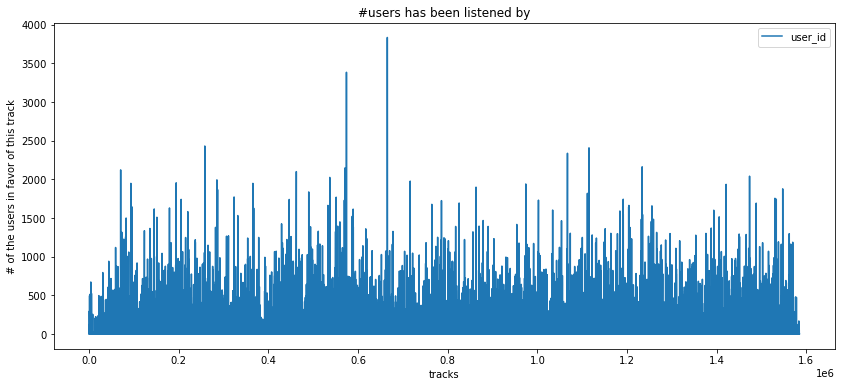

In [22]:
df_playlist = df_notnull.copy()
df_playlist.groupby(["track"], as_index=False)["user_id"].nunique().plot(figsize=(14,6), title='#users has been listened by'
                                                                        ,xlabel = 'tracks', ylabel = '# of the users in favor of this track')

<AxesSubplot:title={'center':'#tracks a user has listened to'}, xlabel='users', ylabel='# of the track occurences'>

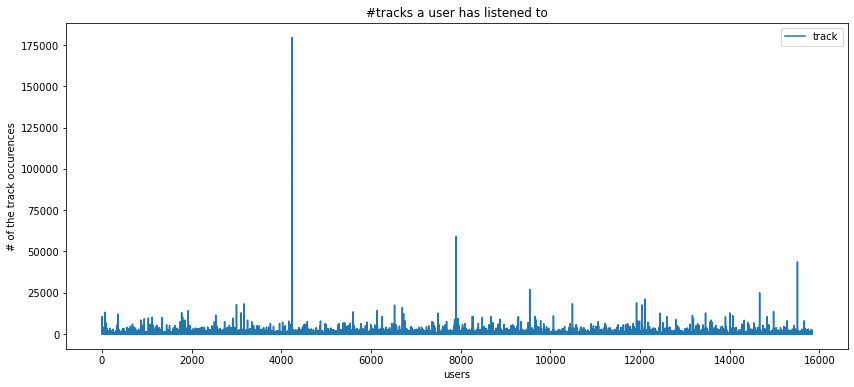

In [23]:
df_playlist.groupby(["user_id"], as_index=False)["track"].nunique().plot(figsize=(14,6), title='#tracks a user has listened to'
                                                                        ,xlabel = 'users', ylabel = '# of the track occurences')

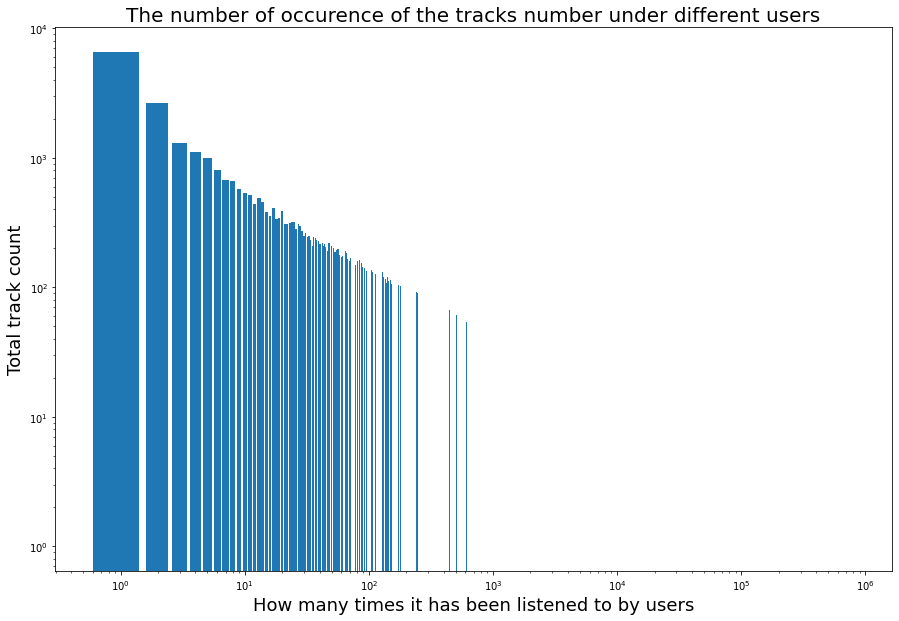

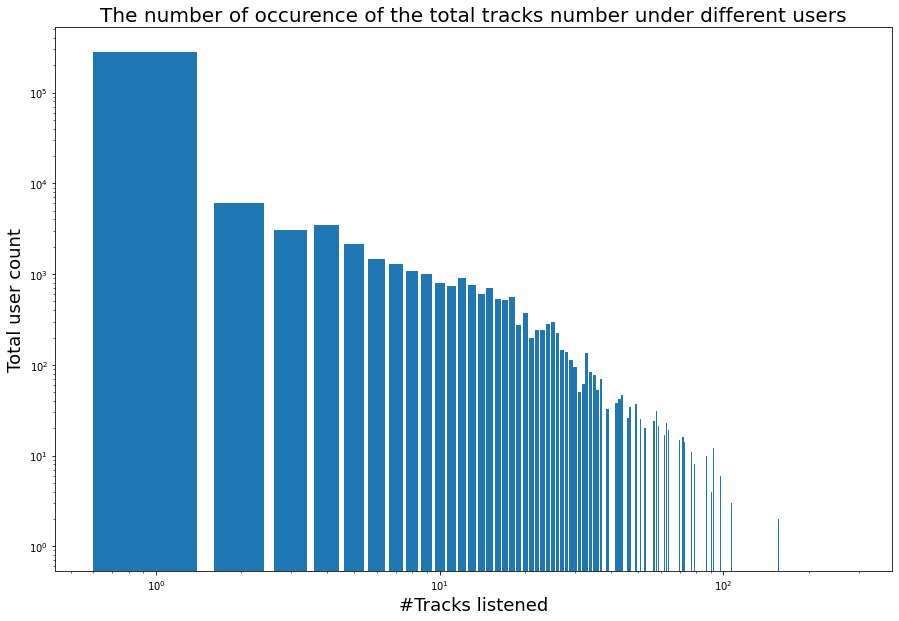

In [24]:
df_songs = df_playlist[["track"]].value_counts()

df_songs_dist = df_songs.value_counts()

df_songs_dist.to_csv('A.csv')

df_songs_final = pd.read_csv('A.csv', header = None)

x = df_songs_final[1]
y = df_songs_final[0]  
plt.figure(figsize=(15, 10))  
plt.bar(x,y)  
plt.xlabel('How many times it has been listened to by users', fontsize=18)  
plt.ylabel('Total track count', fontsize=18)  
plt.title('The number of occurence of the tracks number under different users', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show() 

df_users = df_playlist[["user_id"]].value_counts()

df_users_dist = df_users.value_counts()

df_users_dist.to_csv('B.csv')

df_users_final = pd.read_csv('B.csv', header = None)

x = df_users_final[1]
y = df_users_final[0]  
plt.figure(figsize=(15, 10))  
plt.bar(x,y)  
plt.xlabel('#Tracks listened', fontsize=18)  
plt.ylabel('Total user count', fontsize=18)  
plt.title('The number of occurence of the total tracks number under different users', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show() 

In [25]:
musicdf = pd.read_csv('spotify_audio_feature.csv')

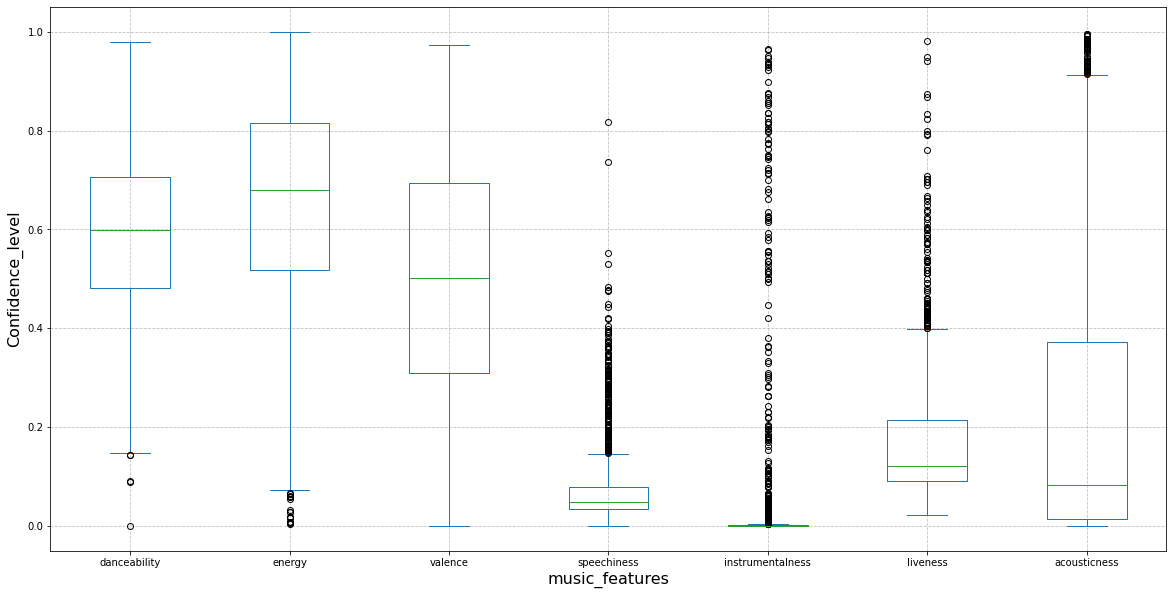

In [26]:
boxdata = pd.DataFrame(musicdf, columns = ['danceability', 'energy', 'valence', 'speechiness', 'instrumentalness', 'liveness', 'acousticness'])
plt.rcParams['figure.figsize'] = (20,10)
boxdata.plot.box()
# columns=['A','B', 'C', 'D', 'E', 'F', 'G']

plt.xlabel("music_features",fontsize=16)
plt.ylabel('Confidence_level',fontsize=16) 

plt.grid(linestyle="--", alpha=0.8)
plt.savefig('boxplot.jpg')
plt.savefig('boxplot.png')
plt.show()

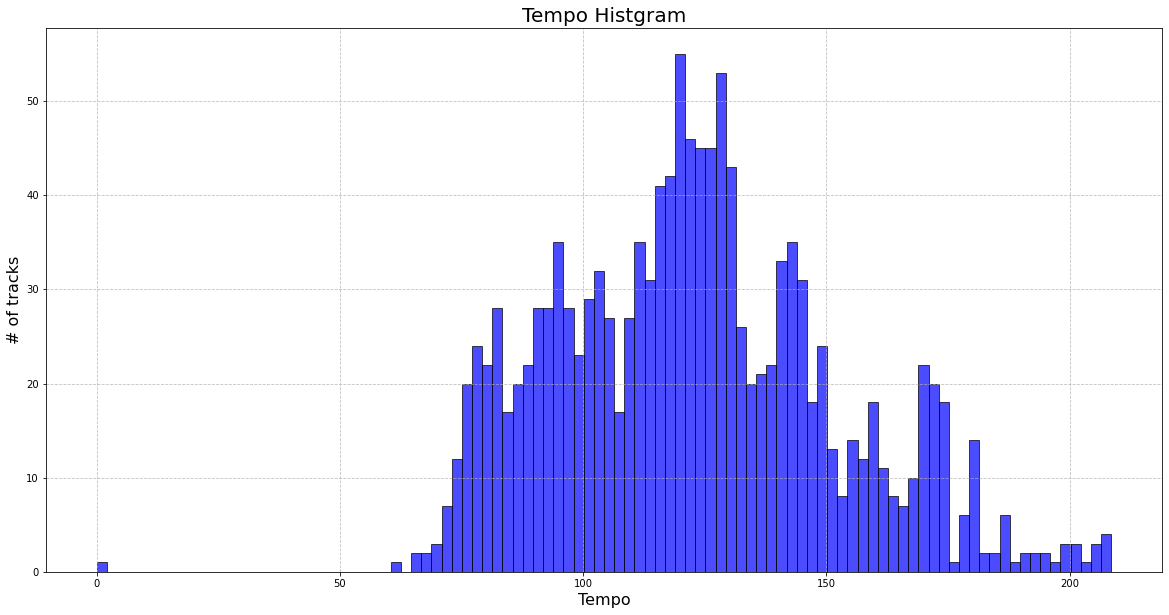

In [27]:
histdata = pd.DataFrame(musicdf, columns = ['tempo'])
plt.hist(histdata, bins=100, facecolor="blue", edgecolor="black", alpha=0.7)

plt.xlabel("Tempo",fontsize=16)
plt.ylabel("# of tracks",fontsize=16)
plt.title("Tempo Histgram",fontsize=20)

plt.grid(linestyle="--", alpha=0.8)
plt.savefig('Tempo_Histgram.jpg')
plt.savefig('Tempo_Histgram.png')
plt.show()

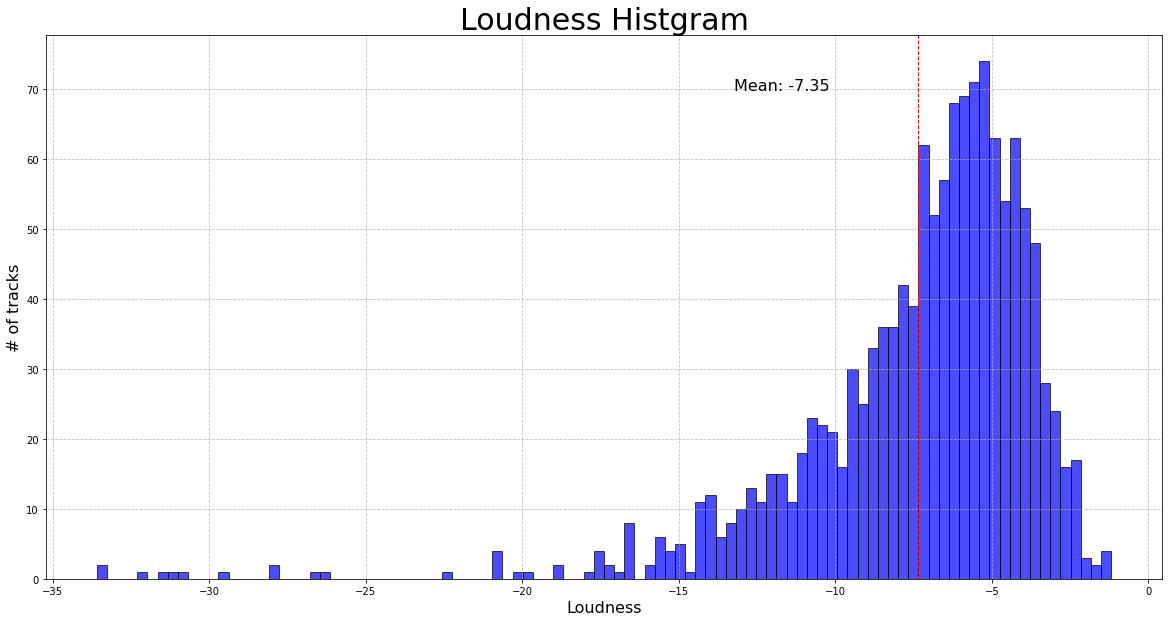

In [28]:
histdata1 = pd.DataFrame(musicdf, columns = ['loudness'])
plt.hist(histdata1, bins=100, facecolor="blue", edgecolor="black", alpha=0.7)

plt.xlabel("Loudness",fontsize=16)
plt.ylabel("# of tracks",fontsize=16)
plt.title("Loudness Histgram",fontsize=30)

min_ylim, max_ylim = plt.ylim()
plt.axvline(np.array(histdata1).mean(), color='r', linestyle='dashed', linewidth=1)
plt.text(np.array(histdata1).mean()*(1.8), max_ylim*0.9, 'Mean: {:.2f}'.format(np.array(histdata1).mean()),fontsize=16)

plt.grid(linestyle="--", alpha=0.8)
plt.savefig('Loudness_Histgram.jpg')
plt.savefig('Loudness_Histgram.png')
plt.show()

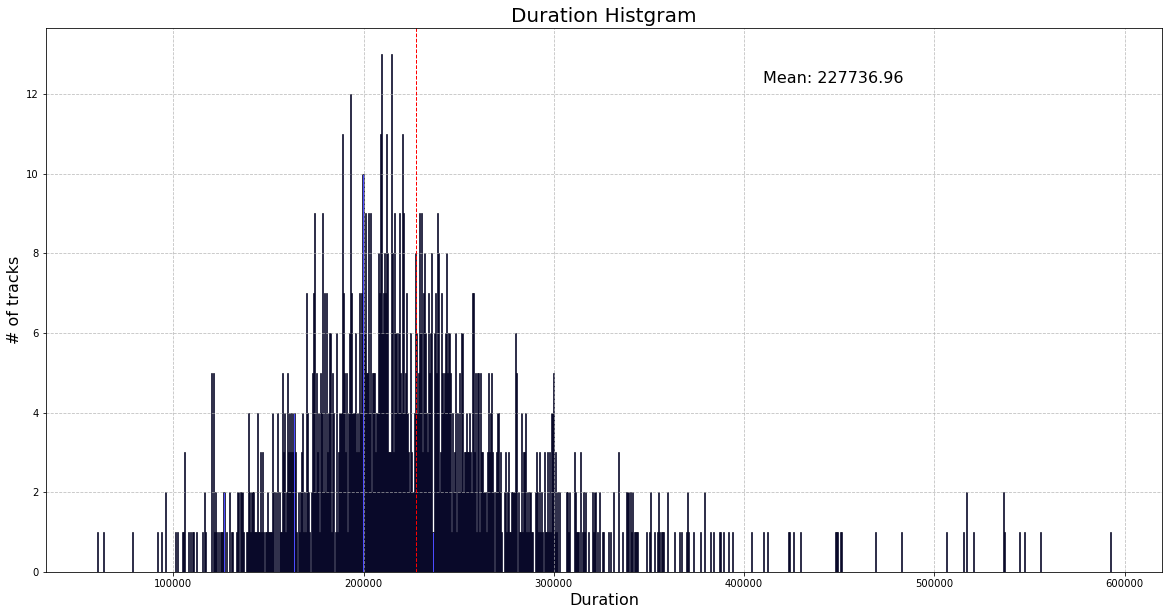

In [29]:
histdata2 = pd.DataFrame(musicdf, columns = ['duration_ms'])
plt.hist(histdata2, bins=1000, facecolor="blue", edgecolor="black", alpha=0.7)

plt.xlabel("Duration",fontsize=16)
plt.ylabel("# of tracks",fontsize=16)
plt.title("Duration Histgram",fontsize=20)

min_ylim, max_ylim = plt.ylim()
plt.axvline(np.array(histdata2).mean(), color='r', linestyle='dashed', linewidth=1)
plt.text(np.array(histdata2).mean()*(1.8), max_ylim*0.9, 'Mean: {:.2f}'.format(np.array(histdata2).mean()),fontsize=16)

plt.grid(linestyle="--", alpha=0.8)
plt.savefig('Duration_Histgram.jpg')
plt.savefig('Duration_Histgram.png')
plt.show()

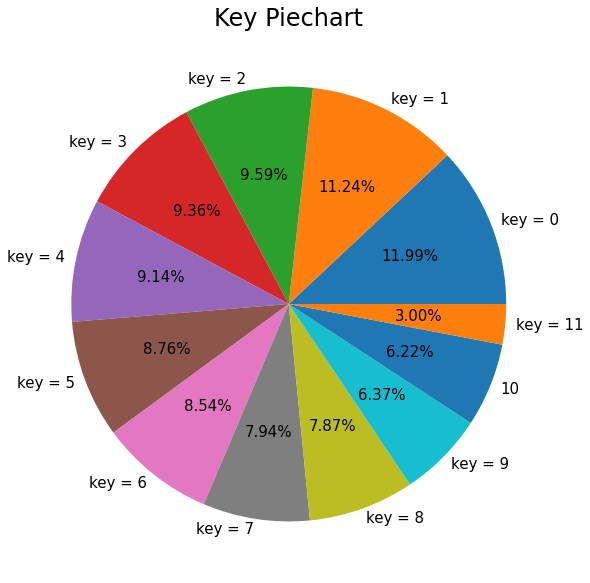

In [30]:
piedata1 = musicdf['key']
result = pd.value_counts(piedata1)

label_list = 'key = 0', 'key = 1', 'key = 2', 'key = 3', 'key = 4', 'key = 5', 'key = 6', 'key = 7', 'key = 8', 'key = 9', '10', 'key = 11'
plt.pie(result, labels = label_list, autopct="%1.2f%%", textprops={'fontsize': 15}, labeldistance=1.05)
plt.title("Key Piechart", fontsize=24)

plt.savefig('Key_Piechart.jpg')
plt.savefig('Key_Piechart.png')
plt.show()

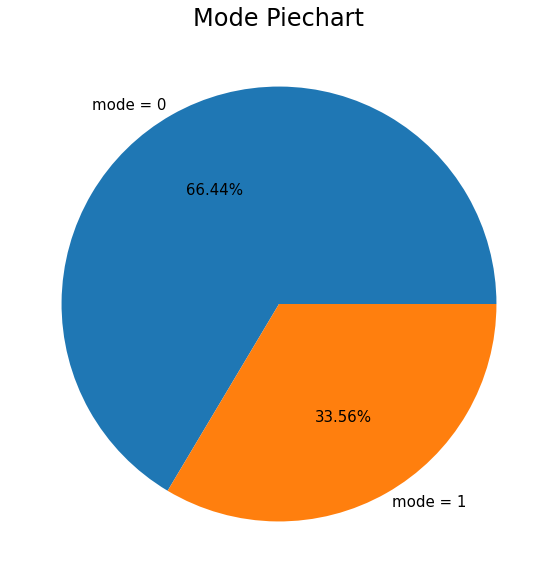

In [31]:
piedata2 = musicdf['mode']
result2 = pd.value_counts(piedata2)

label_list = 'mode = 0', 'mode = 1'
plt.pie(result2, labels = label_list, autopct="%1.2f%%", textprops={'fontsize': 15}, labeldistance=1.05)
plt.title("Mode Piechart", fontsize=24)
plt.savefig('Mode_Piechart.jpg')
plt.savefig('Mode_Piechart.png')
plt.show()

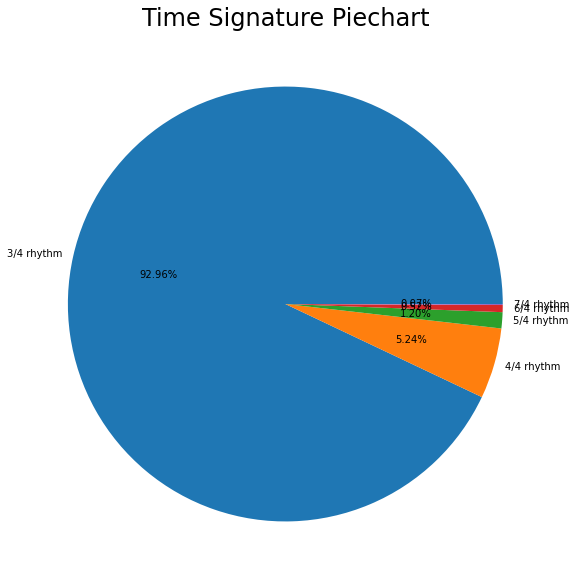

In [32]:
piedata3 = musicdf['time_signature']
result3 = pd.value_counts(piedata3)

label_list = '3/4 rhythm', '4/4 rhythm', '5/4 rhythm', '6/4 rhythm', '7/4 rhythm'
plt.pie(result3, labels = label_list, autopct="%1.2f%%", textprops={'fontsize': 10}, labeldistance=1.05)
plt.title("Time Signature Piechart", fontsize=24)
plt.savefig('Time_Signature_Piechart.jpg')
plt.savefig('Time_Signature_Piechart.png')
plt.show()